In [146]:
import requests
import time
import tqdm
import pandas as pd
import os
import json
from bs4 import BeautifulSoup
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import re
import time
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np 
from datetime import datetime
import seaborn as sns
import warnings

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, learning_curve, validation_curve 
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import Lasso, LinearRegression, LogisticRegression, ElasticNet
from sklearn.metrics import mean_squared_error as mse
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)


plt.style.use('ggplot')

fp_data = Path.cwd() / "data1"  
# Use the Path object to actually create the subfolder
Path.mkdir(fp_data, exist_ok=True) 

In [140]:
file_path = fp_data / 'data_processed.csv'

BOOKS = pd.read_csv(file_path)

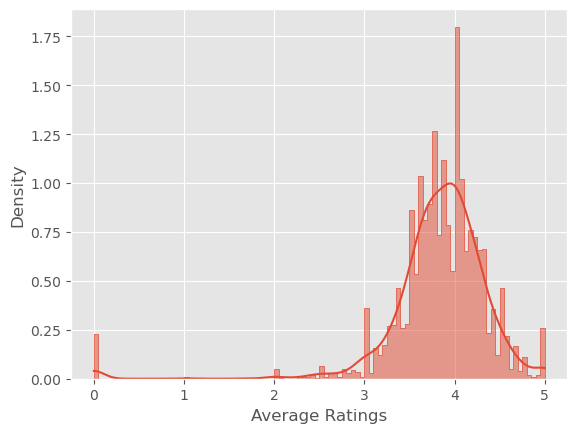

In [141]:
sns.histplot(data=BOOKS, x='Avg_ratings', bins=100, kde=True, element='step', stat='density')


# Add labels and title
plt.xlabel('Average Ratings')
plt.ylabel('Density')

plt.savefig(fp_data / 'average_ratings.png')

In [142]:
BOOKS2 = BOOKS.drop(columns=['Author1', 'Author2', 'Author3', 'Author4'])

summary_table = BOOKS2.describe(percentiles=[.25, .5, .75])

summary_table = summary_table.transpose()

# Save the summary table to a CSV file
summary_table.to_csv(fp_data / 'summary_statistics.csv')

summary_table

,count,mean,std,min,25%,50%,75%,max
Avg_ratings,3980.0,3.829216,0.593756,0.0,3.62,3.89,4.14,5.0
nratings,3980.0,293.370352,3508.362479,0.0,8.00,23.50,73.00,139652.0
nreviews,3980.0,22.982663,257.870616,0.0,1.00,2.00,7.00,10385.0
Pages,3980.0,324.116080,195.966771,1.0,210.00,285.00,388.00,3481.0
Published_year,3980.0,1999.606030,25.187521,1516.0,1993.00,2005.50,2013.00,2023.0


In [186]:
file_path = fp_data/ 'data_processed.csv'
df = pd.read_csv(file_path)

In [187]:
Countvec = CountVectorizer()

titel_Countvec = Countvec.fit_transform(df['proc_ti'])

titel_array_cv = titel_Countvec.toarray()

titel_df_vec = pd.DataFrame(data=titel_array_cv, columns=Countvec.get_feature_names_out())
titel_sum_vec = pd.DataFrame(data=titel_df_vec.sum(), columns = ['Score_tit'])

titel_sum_vec = titel_sum_vec.sort_values(by=['Score_tit'], ascending = False).head(30)

In [188]:
titel_sum_vec = titel_sum_vec[0:10]
titel_sum_vec.reset_index(inplace=True)
titel_sum_vec

,index,Score_tit
0,economics,1001
1,psychology,981
2,anthropology,613
3,sociology,330
4,science,267
5,introduction,207
6,social,194
7,politics,179
8,human,162
9,political,154


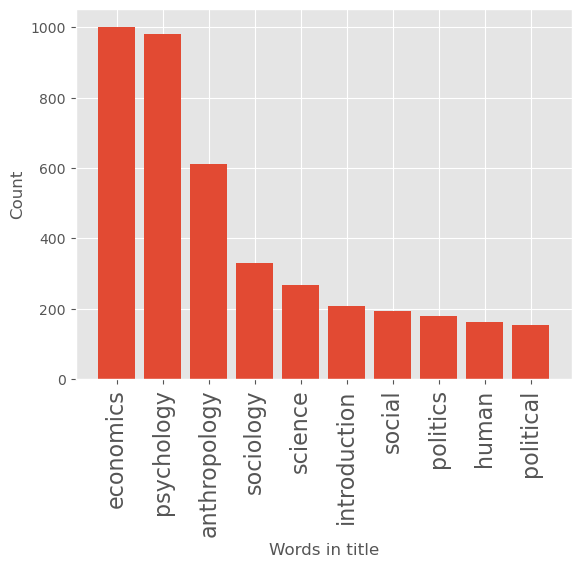

In [215]:
plt.bar(titel_sum_vec['index'], titel_sum_vec['Score_tit'])

plt.ylabel('Count')
plt.xlabel('Words in title')

xtick_positions = titel_sum_vec['index']
xtick_labels = titel_sum_vec['index']
plt.xticks(xtick_positions, xtick_labels, rotation=90, fontsize=16)

plt.savefig(fp_data / 'words_title.png', bbox_inches='tight')

In [192]:
des_Countvec = Countvec.fit_transform(df['proc_de'])

des_array_vec = des_Countvec.toarray()

des_df_vec = pd.DataFrame(data=des_array_vec, columns=Countvec.get_feature_names_out())
des_sum_vec = pd.DataFrame(data=des_df_vec.sum(), columns=['Score_des_count'])

des_sum_vec = des_sum_vec.sort_values(by=['Score_des_count'], ascending = False).head(30)

In [196]:
des_sum_vec = des_sum_vec[0:20]
des_sum_vec.reset_index(inplace=True)
des_sum_vec

,level_0,index,Score_des_count
0,0,book,3463
1,1,social,2162
2,2,psychology,2090
3,3,economics,2042
4,4,new,1833
5,5,study,1581
6,6,life,1574
7,7,work,1559
8,8,economic,1517
9,9,human,1481


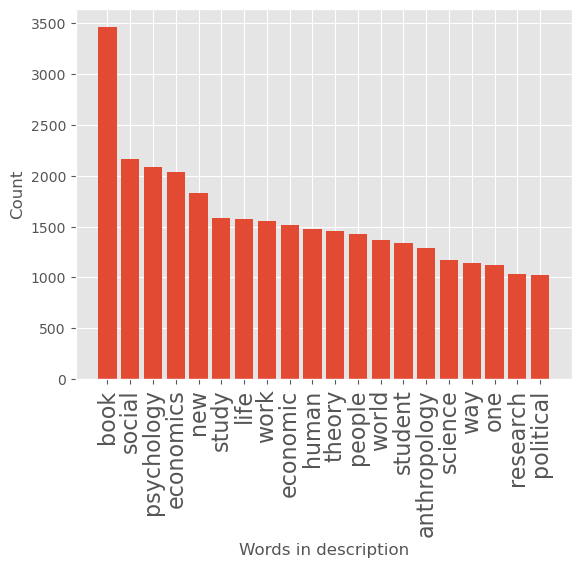

In [214]:
plt.bar(des_sum_vec['index'], des_sum_vec['Score_des_count'])

plt.ylabel('Count')
plt.xlabel('Words in description')

xtick_positions = des_sum_vec['index']
xtick_labels = des_sum_vec['index']
plt.xticks(xtick_positions, xtick_labels, rotation=90, fontsize=16)

plt.savefig(fp_data / 'words_description.png', bbox_inches='tight')